In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

In [101]:
a = 1
b = 1
seq = [1,1]

In [102]:
for i in range(40):
    seq.append(seq[-2]+seq[-1])

In [103]:
print(len(seq))

42


In [104]:
seq = np.array(seq)

In [105]:
seq.shape

(42,)

In [106]:
seq = seq.reshape(-1,1)
print(seq.shape)

(42, 1)


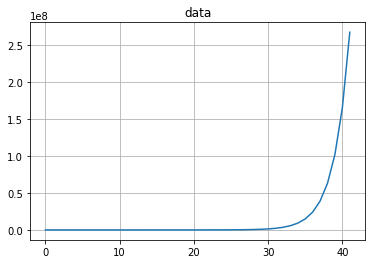

In [107]:
plt.grid()
plt.title('data')
plt.plot(seq[:1000])
plt.show()

In [108]:
def make_train_from_seq(seq,window,hori):
    X = []
    Y = []
    
    for i in range(seq.shape[0] - window - hori + 1):
        X.append(seq[i:i+window])
        Y.append(seq[i+window+hori-1])
        
    return np.array(X), np.array(Y)

In [109]:
w = 20
h = 1
X, Y = make_train_from_seq(seq, w,h)
print(X.shape, Y.shape)

(22, 20, 1) (22, 1)


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state=1234)

In [112]:
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(17, 20, 1) (17, 1) (5, 20, 1) (5, 1)


# RNN 모델 생성

In [113]:
model = Sequential()

In [114]:
model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(1))


In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 128)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss = 'mse', optimizer='adam', metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 963ms/step - loss: 6829807601975296.0000 - mae: 40898680.0000 - val_loss: 6525439442944.0000 - val_mae: 1222685.7500
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 6829808675717120.0000 - mae: 40898680.0000 - val_loss: 6525439442944.0000 - val_mae: 1222685.7500
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 6829808138846208.0000 - mae: 40898684.0000 - val_loss: 6525439442944.0000 - val_mae: 1222685.7500
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 6829807601975296.0000 - mae: 40898684.0000 - val_loss: 6525438394368.0000 - val_mae: 1222685.2500
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 6829808138846208.0000 - mae: 40898680.0000 - val_loss: 6525438394368.0000 - val_mae: 1222685.2500
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 6829807601975296.0000 - mae: 40898680.0000 - val_loss: 6525438394368.0000 - v

Epoch 49/100
1/1 [==============================] - 0s 37ms/step - loss: 6829807601975296.0000 - mae: 40898676.0000 - val_loss: 6525424238592.0000 - val_mae: 1222679.7500
Epoch 50/100
1/1 [==============================] - 0s 33ms/step - loss: 6829807601975296.0000 - mae: 40898676.0000 - val_loss: 6525423190016.0000 - val_mae: 1222679.2500
Epoch 51/100
1/1 [==============================] - 0s 32ms/step - loss: 6829808138846208.0000 - mae: 40898676.0000 - val_loss: 6525423190016.0000 - val_mae: 1222679.2500
Epoch 52/100
1/1 [==============================] - 0s 33ms/step - loss: 6829808138846208.0000 - mae: 40898676.0000 - val_loss: 6525423190016.0000 - val_mae: 1222679.2500
Epoch 53/100
1/1 [==============================] - 0s 33ms/step - loss: 6829807601975296.0000 - mae: 40898676.0000 - val_loss: 6525423190016.0000 - val_mae: 1222679.2500
Epoch 54/100
1/1 [==============================] - 0s 34ms/step - loss: 6829807601975296.0000 - mae: 40898676.0000 - val_loss: 6525421617152.000

Epoch 97/100
1/1 [==============================] - 0s 47ms/step - loss: 6829806528233472.0000 - mae: 40898668.0000 - val_loss: 6525408509952.0000 - val_mae: 1222673.2500
Epoch 98/100
1/1 [==============================] - 0s 50ms/step - loss: 6829806528233472.0000 - mae: 40898668.0000 - val_loss: 6525408509952.0000 - val_mae: 1222673.2500
Epoch 99/100
1/1 [==============================] - 0s 49ms/step - loss: 6829806528233472.0000 - mae: 40898664.0000 - val_loss: 6525408509952.0000 - val_mae: 1222673.2500
Epoch 100/100
1/1 [==============================] - 0s 145ms/step - loss: 6829806528233472.0000 - mae: 40898668.0000 - val_loss: 6525408509952.0000 - val_mae: 1222673.2500
